In [1]:
# Carregar bibliotecas
import spacy
import pandas as pd
import spacy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Carregar modelo pré-treinado: pt_core_news_sm
!python -m spacy download pt_core_news_sm

# pt   : Refere-se ao idioma Português.
# core : Indica que é um modelo "principal", que inclui um pipeline de componentes essenciais (como reconhecimento de entidades, classes gramaticais, etc.).
# news : Significa que o modelo foi treinado em um corpus de texto composto por notícias.
# sm   : É a abreviação de "small" (pequeno). Indica o tamanho do modelo.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 59.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
# Abrir dataset com dados para teste
df = pd.read_csv("Basefictícia.csv")
print(f"Total de linhas: {len(df)}")

Total de linhas: 35


In [5]:
# Executa modelo pré-treinado no dataset de teste
# Cria dataset de saída com o resultado das entidades encontradas

nlp = spacy.load("pt_core_news_sm")

entidades = []
for frase in df['frase'].unique():
    doc = nlp(frase)
    for ent in doc.ents:
        entidades.append({"frase": frase, "entidade": ent.text, "y_pred": ent.label_})

df_entidades = pd.DataFrame(entidades)

In [6]:
# A partir do df original, que contém os tipos corretos, carrega no df_entidades os valores corretos para comparação com o predito pelo modelo.

df_tipo_mapping = df[['entidade', 'tipo']].drop_duplicates().rename(columns={'tipo': 'y_true'})

if 'y_true' in df_entidades.columns:
    df_entidades = df_entidades.drop(columns=['y_true'])

df_entidades = df_entidades.merge(df_tipo_mapping, on='entidade', how='left')

 Relatório de Classificação
              precision    recall  f1-score   support

         LOC      0.500     1.000     0.667         8
        MISC      0.000     0.000     0.000         0
         ORG      0.333     0.125     0.182         8
         PER      1.000     1.000     1.000         8
        PROD      0.000     0.000     0.000         8

    accuracy                          0.531        32
   macro avg      0.367     0.425     0.370        32
weighted avg      0.458     0.531     0.462        32



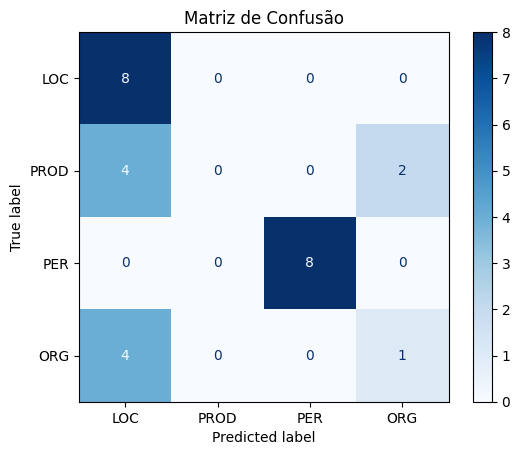

In [11]:
# Gera matriz confusão para comparar o resultado do modelo
y_true = df_entidades['y_true'].tolist()
y_pred = df_entidades['y_pred'].tolist()

print(" Relatório de Classificação")
print( classification_report(y_true, y_pred, digits=3, zero_division=0))

cm = confusion_matrix( y_true
                     , y_pred
                     , labels=list(set(y_true)))

disp = ConfusionMatrixDisplay( confusion_matrix = cm
                             , display_labels=list(set(y_true)))

disp.plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()

O modelo avaliado **não é adequado** para o seu caso de uso, apresentando um desempenho geral fraco (F1-score médio de 0,37) e altamente desequilibrado. Enquanto ele demonstrou perfeição na identificação de **Pessoas (PER)**, falhou gravemente nas demais categorias essenciais: detectou **Locais (LOC)** com muita imprecisão (confundindo-os com outros termos), teve um desempenho péssimo para **Organizações (ORG)** e foi completamente incapaz de identificar **Produtos (PROD)**, sugerindo que a versão `sm` (small) não possui a capacidade ou o treinamento necessário para distinguir essas entidades específicas nos seus dados.